In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
df = pd.read_csv('Blood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   748 non-null    int64
 1   F1      748 non-null    int64
 2   F2      748 non-null    int64
 3   F3      748 non-null    int64
 4   F4      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [2]:
X_features = df[['F1', 'F2', 'F3', 'F4']]
Y_features = df['class']
X = sm.add_constant(X_features)
Y = Y_features

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 

In [3]:
xtrain_samples = train_X.shape[0]
xtest_samples = test_X.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 598 samples for training and 150 samples for testing.


In [4]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',probability=True)

In [5]:
svc.fit(train_X, train_Y)
y_pred = svc.predict(test_X)

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       113
           1       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.76      0.54      0.51       150
weighted avg       0.76      0.77      0.69       150



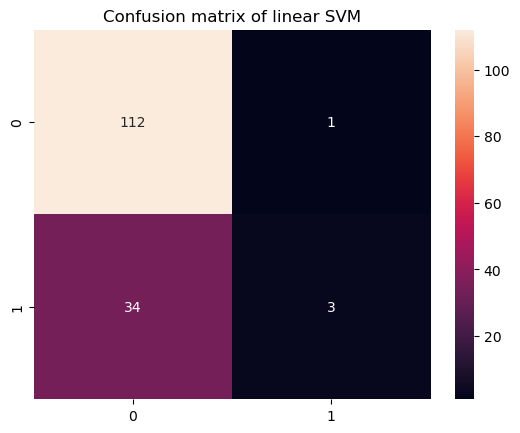

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_Y,y_pred)
sn.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') 

print(classification_report(test_Y,y_pred))

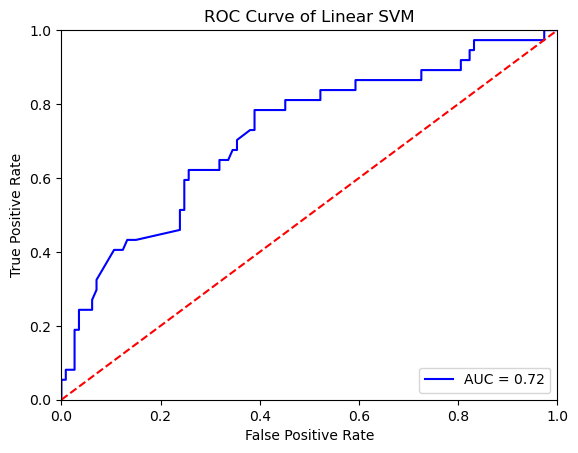

In [7]:
y_scores_ada = svc.predict_proba(test_X)
fpr, tpr, threshold = roc_curve(test_Y, y_scores_ada[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Linear SVM')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       113
           1       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.76      0.54      0.51       150
weighted avg       0.76      0.77      0.69       150



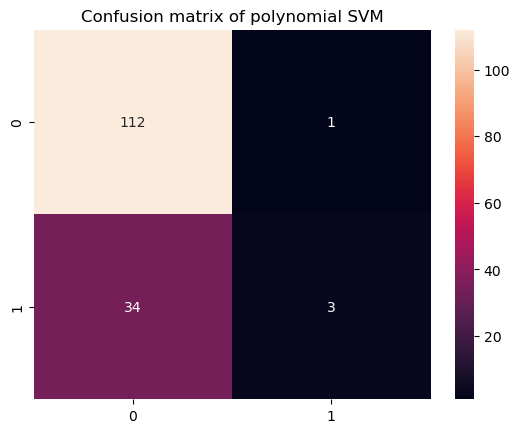

In [8]:
svc = SVC(kernel='poly',degree=7,probability=True)
svc.fit(train_X, train_Y)
y_pred = svc.predict(test_X)

cm = confusion_matrix(test_Y,y_pred)
sn.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of polynomial SVM')

print(classification_report(test_Y,y_pred))

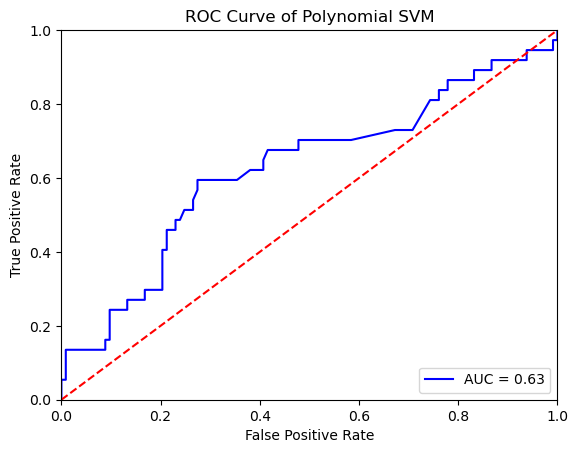

In [9]:
y_scores_ada = svc.predict_proba(test_X)
fpr, tpr, threshold = roc_curve(test_Y, y_scores_ada[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Polynomial SVM')
plt.show()

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       113
           1       1.00      0.03      0.05        37

    accuracy                           0.76       150
   macro avg       0.88      0.51      0.46       150
weighted avg       0.82      0.76      0.66       150



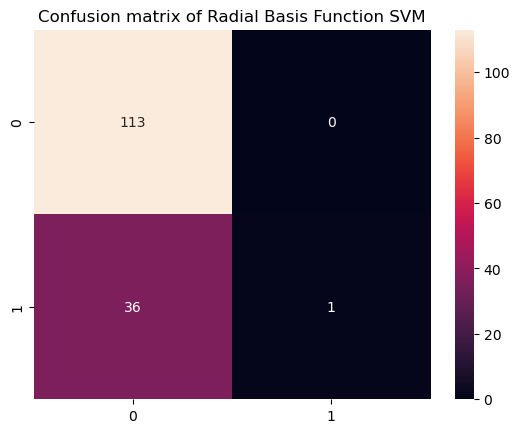

In [10]:
svc = SVC(kernel='rbf',gamma='scale',probability=True)
svc.fit(train_X, train_Y)
y_pred = svc.predict(test_X)

cm = confusion_matrix(test_Y,y_pred)
sn.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Radial Basis Function SVM') 

print(classification_report(test_Y,y_pred))

#Accuracy reduces when gamma is set to scale

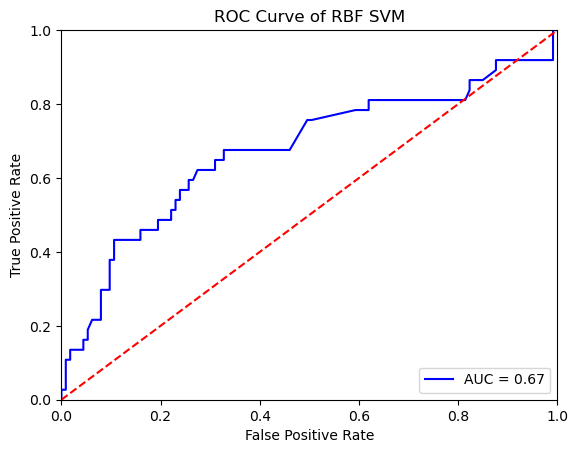

In [11]:
y_scores_ada = svc.predict_proba(test_X)
fpr, tpr, threshold = roc_curve(test_Y, y_scores_ada[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RBF SVM')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       113
           1       0.35      0.19      0.25        37

    accuracy                           0.71       150
   macro avg       0.56      0.54      0.53       150
weighted avg       0.67      0.71      0.68       150



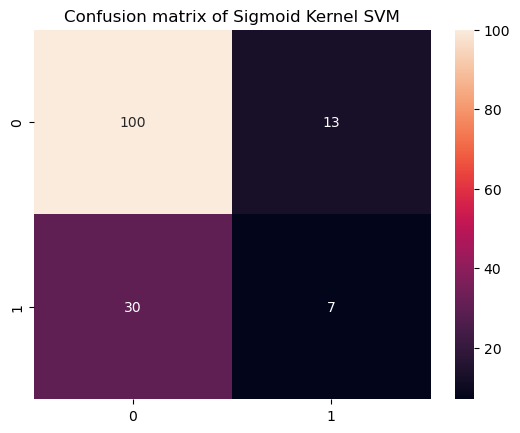

In [12]:
svc = SVC(kernel='sigmoid',probability=True)
svc.fit(train_X, train_Y)
y_pred = svc.predict(test_X)

cm = confusion_matrix(test_Y,y_pred)
sn.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Sigmoid Kernel SVM') 

print(classification_report(test_Y,y_pred))

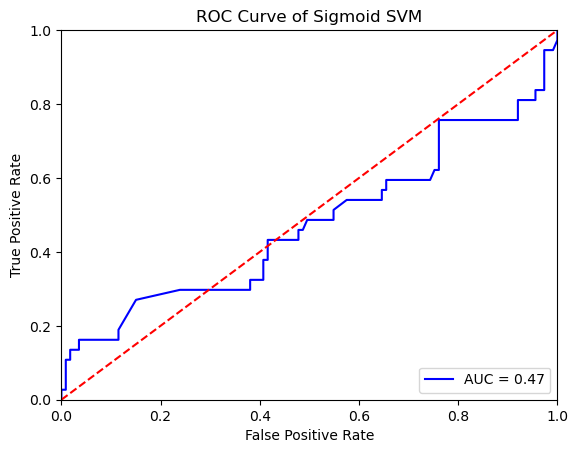

In [13]:
y_scores_ada = svc.predict_proba(test_X)
fpr, tpr, threshold = roc_curve(test_Y, y_scores_ada[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Sigmoid SVM')
plt.show()